In [1]:
# storing and anaysis
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
%matplotlib inline

In [26]:
# Reading the tab seperated file
editions = pd.read_csv('C:/Users/Chaitanya/Desktop/ML - Coursera/DataCamp/Projects/Olympic/Summer Olympic medals/Summer Olympic medalists 1896 to 2008 - EDITIONS.tsv', sep='\t')

# Extract the relevant columns: editions
editions = editions[['Edition', 'Grand Total', 'City', 'Country']]

editions.head()

,Edition,Grand Total,City,Country
0,1896,151,Athens,Greece
1,1900,512,Paris,France
2,1904,470,St. Louis,United States
3,1908,804,London,United Kingdom
4,1912,885,Stockholm,Sweden


In [18]:
ioc_codes = pd.read_csv('C:/Users/Chaitanya/Desktop/ML - Coursera/DataCamp/Projects/Olympic/Summer Olympic medals/Summer Olympic medalists 1896 to 2008 - IOC COUNTRY CODES.csv')
ioc_codes = ioc_codes[['Country' , 'NOC']]
ioc_codes.head()

,Country,NOC
0,Afghanistan,AFG
1,Albania,ALB
2,Algeria,ALG
3,American Samoa*,ASA
4,Andorra,AND


In [23]:
medals = pd.read_csv('C:/Users/Chaitanya/Desktop/ML - Coursera/DataCamp/Projects/Olympic/Summer Olympic medals/Summer Olympic medalists 1896 to 2008 - ALL MEDALISTS.tsv', sep='\t',skiprows=4)
medals = medals[['Athlete', 'NOC','Medal', 'Edition']]
medals.head()

,Athlete,NOC,Medal,Edition
0,"HAJOS, Alfred",HUN,Gold,1896
1,"HERSCHMANN, Otto",AUT,Silver,1896
2,"DRIVAS, Dimitrios",GRE,Bronze,1896
3,"MALOKINIS, Ioannis",GRE,Gold,1896
4,"CHASAPIS, Spiridon",GRE,Silver,1896


In [24]:
medal_counts = pd.pivot_table(medals, aggfunc = 'count', index = 'Edition', values = 'Athlete', columns= 'NOC')
medal_counts.head()

NOC,AFG,AHO,ALG,ANZ,ARG,ARM,AUS,AUT,AZE,BAH,...,URS,URU,USA,UZB,VEN,VIE,YUG,ZAM,ZIM,ZZX
Edition,,,,,,,,,,,,,,,,,,,,,
1896,NaN,NaN,NaN,NaN,NaN,NaN,2.0,5.0,NaN,NaN,...,NaN,NaN,20.0,NaN,NaN,NaN,NaN,NaN,NaN,6.0
1900,NaN,NaN,NaN,NaN,NaN,NaN,5.0,6.0,NaN,NaN,...,NaN,NaN,55.0,NaN,NaN,NaN,NaN,NaN,NaN,34.0
1904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,394.0,NaN,NaN,NaN,NaN,NaN,NaN,8.0
1908,NaN,NaN,NaN,19.0,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,63.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1912,NaN,NaN,NaN,10.0,NaN,NaN,NaN,14.0,NaN,NaN,...,NaN,NaN,101.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
#Computing fraction of medals per Olympic edition

totals = editions.set_index('Edition')
totals = totals['Grand Total']

# Divide medal_counts by totals: fractions
fractions = medal_counts.divide(totals, axis='rows')

fractions.head()

NOC,AFG,AHO,ALG,ANZ,ARG,ARM,AUS,AUT,AZE,BAH,...,URS,URU,USA,UZB,VEN,VIE,YUG,ZAM,ZIM,ZZX
Edition,,,,,,,,,,,,,,,,,,,,,
1896,NaN,NaN,NaN,NaN,NaN,NaN,0.013245,0.033113,NaN,NaN,...,NaN,NaN,0.132450,NaN,NaN,NaN,NaN,NaN,NaN,0.039735
1900,NaN,NaN,NaN,NaN,NaN,NaN,0.009766,0.011719,NaN,NaN,...,NaN,NaN,0.107422,NaN,NaN,NaN,NaN,NaN,NaN,0.066406
1904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002128,NaN,NaN,...,NaN,NaN,0.838298,NaN,NaN,NaN,NaN,NaN,NaN,0.017021
1908,NaN,NaN,NaN,0.023632,NaN,NaN,NaN,0.001244,NaN,NaN,...,NaN,NaN,0.078358,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1912,NaN,NaN,NaN,0.011299,NaN,NaN,NaN,0.015819,NaN,NaN,...,NaN,NaN,0.114124,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
# Computing percentage change in fraction of medals won

# Apply the expanding mean: mean_fractions
mean_fractions = fractions.expanding().mean()

# Compute the percentage change: fractions_change
fractions_change = mean_fractions.pct_change()*100

# Reset the index of fractions_change: fractions_change
fractions_change = fractions_change.reset_index()

fractions_change.head()

NOC,Edition,AFG,AHO,ALG,ANZ,ARG,ARM,AUS,AUT,AZE,...,URS,URU,USA,UZB,VEN,VIE,YUG,ZAM,ZIM,ZZX
0,1896,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1900,NaN,NaN,NaN,NaN,NaN,NaN,-13.134766,-32.304688,NaN,...,NaN,NaN,-9.448242,NaN,NaN,NaN,NaN,NaN,NaN,33.561198
2,1904,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,-30.169386,NaN,...,NaN,NaN,199.651245,NaN,NaN,NaN,NaN,NaN,NaN,-22.642384
3,1908,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,-23.013510,NaN,...,NaN,NaN,-19.549222,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
4,1912,NaN,NaN,NaN,-26.092774,NaN,NaN,0.000000,6.254438,NaN,...,NaN,NaN,-12.105733,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


In [36]:
# Left join editions and ioc_codes: hosts
hosts = pd.merge(editions, ioc_codes, how='left')

# Extract relevant columns and set index: hosts
hosts = hosts[['Edition', 'NOC']].set_index('Edition')

# Fix missing 'NOC' values of hosts
print(hosts.loc[hosts.NOC.isnull()])

         NOC
Edition     
1972     NaN
1980     NaN
1988     NaN


In [37]:
hosts.loc[1972, 'NOC'] = 'FRG'
hosts.loc[1980, 'NOC'] = 'URS'
hosts.loc[1988, 'NOC'] = 'KOR'

# Reset Index of hosts: hosts
hosts = hosts.reset_index()
hosts.head()

,Edition,NOC
0,1896,GRE
1,1900,FRA
2,1904,USA
3,1908,GBR
4,1912,SWE


In [40]:
# Reshape fractions_change: reshaped
reshaped = pd.melt(fractions_change, id_vars = ['Edition'], value_name = 'Change')

# Print reshaped.shape and fractions_change.shape
print(reshaped.shape, fractions_change.shape)
reshaped.head()

(3588, 3) (26, 139)


,Edition,NOC,Change
0,1896,AFG,NaN
1,1900,AFG,NaN
2,1904,AFG,NaN
3,1908,AFG,NaN
4,1912,AFG,NaN


In [42]:
# Extract rows from reshaped where 'NOC' == 'CHN': chn
chn = reshaped[reshaped['NOC']=='CHN']
chn.tail()

,Edition,NOC,Change
567,1992,CHN,4.240630
568,1996,CHN,7.860247
569,2000,CHN,-3.851278
570,2004,CHN,0.128863
571,2008,CHN,13.251332


In [46]:
# Merge reshaped and hosts: merged
merged = pd.merge(reshaped, hosts, how='inner')

# Set Index of merged and sort it: influence
influence = merged.set_index('Edition').sort_index()
influence.head()

,NOC,Change
Edition,,
1896,GRE,NaN
1900,FRA,198.002486
1904,USA,199.651245
1908,GBR,134.489218
1912,SWE,71.896226


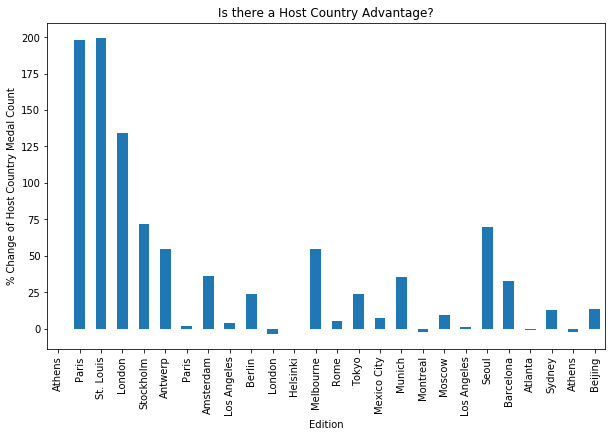

In [48]:
# Extract influence['Change']: change
change = influence['Change']

# Make bar plot of change: ax
ax = change.plot(kind='bar', figsize = (10,6))

# Customize the plot to improve readability
ax.set_ylabel("% Change of Host Country Medal Count")
ax.set_title("Is there a Host Country Advantage?")
ax.set_xticklabels(editions['City'])

# Display the plot
plt.show()